# Programa 1

## Objetivo
- En este ejercicio, el objetivo principal es aprender cómo emplear las técnicas de
representacóon vectorial, bag-of-words y TF-IDF, y los algoritmos de aprendizajeá́aquina Naive Bayes, Arboles de Deció́on, SVM (Support Vector Machine) ́
Regró ́on í ́ıstica para clasificó ́on de textos.

## Implementación Naive Bayes

### Tratamiento de los datos

In [1]:
#Importación de bibliotecas necesarias
import pandas as pd

In [3]:
email_train = pd.read_csv("E:\\MATERIAS CURSADAS\\ONCEAVO SEMESTRE\\PLN\\fraud_email_train.csv")
email_test = pd.read_csv("E:\\MATERIAS CURSADAS\\ONCEAVO SEMESTRE\\PLN\\fraud_email_test.csv")
email_train.head()

C:\Users\lario\AppData\Local\Temp\ipykernel_8356\874231247.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  email_train = pd.read_csv("E:\\MATERIAS CURSADAS\\ONCEAVO SEMESTRE\\PLN\\fraud_email_train.csv")
C:\Users\lario\AppData\Local\Temp\ipykernel_8356\874231247.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  email_test = pd.read_csv("E:\\MATERIAS CURSADAS\\ONCEAVO SEMESTRE\\PLN\\fraud_email_test.csv")


,Folder-User,Folder-Name,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,...,Re,Source,Mail-ID,POI-Present,Suspicious-Folders,Sender-Type,Unique-Mails-From-Sender,Low-Comm,Contains-Reply-Forwards,Label
0,maildir,mann-k,<28105899.1075845831720.JavaMail.evans@thyme>,"Tue, 10 Apr 2001 02:29:00 -0700 (PDT)",kay.mann@enron.com,isabel.parker@freshfields.com,contact info,1.0,text/plain; charset=us-ascii,7bit,...,,Enron Data,880cc2bd42fef08ac3f0e0ef681739e4598bc37cbf912a...,False,False,Internal,4867.0,False,False,0
1,maildir,nemec-g,<33007824.1075842657140.JavaMail.evans@thyme>,"Wed, 1 Nov 2000 02:37:00 -0800 (PST)",kay.young@enron.com,gerald.nemec@enron.com,Re: CA Data Sheets,1.0,text/plain; charset=us-ascii,7bit,...,,Enron Data,c4476b77834f392c4835042c9681ad9a6469d2c1a5a3af...,False,False,Internal,123.0,False,True,0
2,maildir,germany-c,<32419459.1075853901936.JavaMail.evans@thyme>,"Fri, 26 Jan 2001 09:44:00 -0800 (PST)",chris.germany@enron.com,"susan.pereira@enron.com, lia.halstead@enron.co...",Egan,1.0,text/plain; charset=us-ascii,7bit,...,,Enron Data,f6321b89ced1e0d5f4328a2fe66dae297e26d2744ea827...,False,False,Internal,3608.0,False,False,0
3,maildir,geaccone-t,<2536566.1075862429027.JavaMail.evans@thyme>,"Tue, 27 Nov 2001 04:40:51 -0800 (PST)",rod.hayslett@enron.com,steve.kleb@enron.com,FW: TW Plan and Forecast revenue backup,1.0,text/plain; charset=us-ascii,7bit,...,,Enron Data,73bb788245697c53af284e30e3373a4c8b153f9ded9536...,False,False,Internal,773.0,False,True,0
4,maildir,shackleton-s,<26063831.1075844463255.JavaMail.evans@thyme>,"Tue, 12 Dec 2000 01:35:00 -0800 (PST)",mara_alexander@cargill.com,sara.shackleton@enron.com,ISDA Master Agreement between Enron North Amer...,1.0,text/plain; charset=us-ascii,7bit,...,,Enron Data,e1823159d8b5b453be708ba1b1ff85bed6862ef6382f83...,False,False,External,13.0,False,False,0


- Adición de datos a Label = 0

In [6]:
email_train.loc[(email_train['Label'] != 1) & (email_train['Label'] != 0), 'Label'] = 1
email_test.loc[(email_test['Label'] != 1) & (email_test['Label'] != 0), 'Label'] = 1

- Número de datos y verificacion de datos vacíos

In [9]:
#Emails correctos
count = (email_train['Label'] == 0).sum()
count

356073

In [11]:
#Emails fraudulentos
count = (email_test['Label'] == 1).sum()
count

467

In [13]:
email_test['Body'].isna().sum()

0

- Tratamiento de la bolsa de palabras

In [16]:
email_train = email_train.drop_duplicates(subset=['Body'])
email_test = email_test.drop_duplicates(subset=['Body'])
len(email_train)

214112

In [18]:
email_train = email_train[email_train['Body'].str.strip() != '']
email_test = email_test[email_test['Body'].str.strip() != '']
email_train.head()

,Folder-User,Folder-Name,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,...,Re,Source,Mail-ID,POI-Present,Suspicious-Folders,Sender-Type,Unique-Mails-From-Sender,Low-Comm,Contains-Reply-Forwards,Label
0,maildir,mann-k,<28105899.1075845831720.JavaMail.evans@thyme>,"Tue, 10 Apr 2001 02:29:00 -0700 (PDT)",kay.mann@enron.com,isabel.parker@freshfields.com,contact info,1.0,text/plain; charset=us-ascii,7bit,...,,Enron Data,880cc2bd42fef08ac3f0e0ef681739e4598bc37cbf912a...,False,False,Internal,4867.0,False,False,0
1,maildir,nemec-g,<33007824.1075842657140.JavaMail.evans@thyme>,"Wed, 1 Nov 2000 02:37:00 -0800 (PST)",kay.young@enron.com,gerald.nemec@enron.com,Re: CA Data Sheets,1.0,text/plain; charset=us-ascii,7bit,...,,Enron Data,c4476b77834f392c4835042c9681ad9a6469d2c1a5a3af...,False,False,Internal,123.0,False,True,0
2,maildir,germany-c,<32419459.1075853901936.JavaMail.evans@thyme>,"Fri, 26 Jan 2001 09:44:00 -0800 (PST)",chris.germany@enron.com,"susan.pereira@enron.com, lia.halstead@enron.co...",Egan,1.0,text/plain; charset=us-ascii,7bit,...,,Enron Data,f6321b89ced1e0d5f4328a2fe66dae297e26d2744ea827...,False,False,Internal,3608.0,False,False,0
3,maildir,geaccone-t,<2536566.1075862429027.JavaMail.evans@thyme>,"Tue, 27 Nov 2001 04:40:51 -0800 (PST)",rod.hayslett@enron.com,steve.kleb@enron.com,FW: TW Plan and Forecast revenue backup,1.0,text/plain; charset=us-ascii,7bit,...,,Enron Data,73bb788245697c53af284e30e3373a4c8b153f9ded9536...,False,False,Internal,773.0,False,True,0
4,maildir,shackleton-s,<26063831.1075844463255.JavaMail.evans@thyme>,"Tue, 12 Dec 2000 01:35:00 -0800 (PST)",mara_alexander@cargill.com,sara.shackleton@enron.com,ISDA Master Agreement between Enron North Amer...,1.0,text/plain; charset=us-ascii,7bit,...,,Enron Data,e1823159d8b5b453be708ba1b1ff85bed6862ef6382f83...,False,False,External,13.0,False,False,0


- Se elimina la puntuación del cuerpo de los email

In [21]:
import string
email_train['Body'] = email_train['Body'].str.lower().str.translate(str.maketrans('', '', string.punctuation))
email_test['Body'] = email_test['Body'].str.lower().str.translate(str.maketrans('', '', string.punctuation))
email_train.head()

,Folder-User,Folder-Name,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,...,Re,Source,Mail-ID,POI-Present,Suspicious-Folders,Sender-Type,Unique-Mails-From-Sender,Low-Comm,Contains-Reply-Forwards,Label
0,maildir,mann-k,<28105899.1075845831720.JavaMail.evans@thyme>,"Tue, 10 Apr 2001 02:29:00 -0700 (PDT)",kay.mann@enron.com,isabel.parker@freshfields.com,contact info,1.0,text/plain; charset=us-ascii,7bit,...,,Enron Data,880cc2bd42fef08ac3f0e0ef681739e4598bc37cbf912a...,False,False,Internal,4867.0,False,False,0
1,maildir,nemec-g,<33007824.1075842657140.JavaMail.evans@thyme>,"Wed, 1 Nov 2000 02:37:00 -0800 (PST)",kay.young@enron.com,gerald.nemec@enron.com,Re: CA Data Sheets,1.0,text/plain; charset=us-ascii,7bit,...,,Enron Data,c4476b77834f392c4835042c9681ad9a6469d2c1a5a3af...,False,False,Internal,123.0,False,True,0
2,maildir,germany-c,<32419459.1075853901936.JavaMail.evans@thyme>,"Fri, 26 Jan 2001 09:44:00 -0800 (PST)",chris.germany@enron.com,"susan.pereira@enron.com, lia.halstead@enron.co...",Egan,1.0,text/plain; charset=us-ascii,7bit,...,,Enron Data,f6321b89ced1e0d5f4328a2fe66dae297e26d2744ea827...,False,False,Internal,3608.0,False,False,0
3,maildir,geaccone-t,<2536566.1075862429027.JavaMail.evans@thyme>,"Tue, 27 Nov 2001 04:40:51 -0800 (PST)",rod.hayslett@enron.com,steve.kleb@enron.com,FW: TW Plan and Forecast revenue backup,1.0,text/plain; charset=us-ascii,7bit,...,,Enron Data,73bb788245697c53af284e30e3373a4c8b153f9ded9536...,False,False,Internal,773.0,False,True,0
4,maildir,shackleton-s,<26063831.1075844463255.JavaMail.evans@thyme>,"Tue, 12 Dec 2000 01:35:00 -0800 (PST)",mara_alexander@cargill.com,sara.shackleton@enron.com,ISDA Master Agreement between Enron North Amer...,1.0,text/plain; charset=us-ascii,7bit,...,,Enron Data,e1823159d8b5b453be708ba1b1ff85bed6862ef6382f83...,False,False,External,13.0,False,False,0


In [23]:
email_train['Label'].value_counts()
email_test['Label'].value_counts()

Label
0    76640
1      427
Name: count, dtype: int64

In [357]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

ros = RandomOverSampler(random_state=1)
smote = SMOTE(random_state=42)

X_train = email_train['Body'].values
y_train = email_train['Label'].values

X_test = email_test['Body'].values
y_test = email_test['Label'].values

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123) #División de datos entre entrenamiento y validación
vector = TfidfVectorizer(stop_words = 'english') #Eliminación de artículos

X_train_bow = vector.fit_transform(X_train) #Bolsa de palabras
X_test_bow = vector.transform(X_test)

X_train_bow2, y_train2 = smote.fit_resample(X_train_bow, y_train)

In [359]:
X_train_bow2.shape, X_test_bow.shape

((425346, 502731), (77067, 502731))

In [361]:
import time
inicioT = time.time()
bayes_pred = MultinomialNB(alpha=0.01)
bayes_pred.fit(X_train_bow2, y_train2)
finT = time.time()

predictions = bayes_pred.predict(X_test_bow)
print('Tiempo de entrenamiento: ')
print(finT - inicioT)

Tiempo de entrenamiento: 
0.3148512840270996


In [363]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     76640
           1       0.23      0.81      0.36       427

    accuracy                           0.98     77067
   macro avg       0.62      0.90      0.68     77067
weighted avg       0.99      0.98      0.99     77067



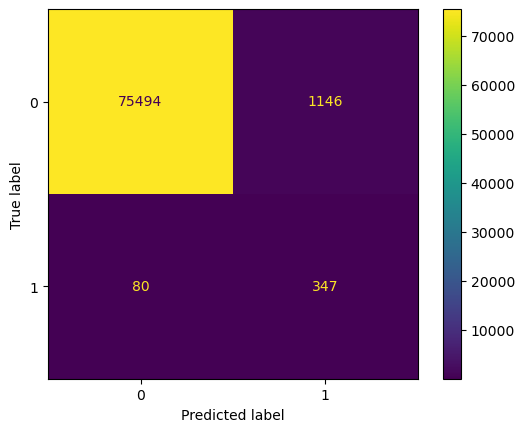

In [365]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictions)

# plot the confusion matrix
disp = ConfusionMatrixDisplay(cm, display_labels=np.unique(y_test))
disp.plot()
plt.show()

## Implementación Tree

In [27]:
import numpy as np
import time

In [367]:
#Tiempo de entramiento con Gini
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import tree

#X_train_TREE = vector.transform(X_train)
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train_bow2, y_train2)

DecisionTreeClassifier(criterion='entropy')

In [369]:
prediccion = clf.predict(X_test_bow)

In [371]:
print(classification_report(y_test, prediccion))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     76640
           1       0.62      0.76      0.68       427

    accuracy                           1.00     77067
   macro avg       0.81      0.88      0.84     77067
weighted avg       1.00      1.00      1.00     77067



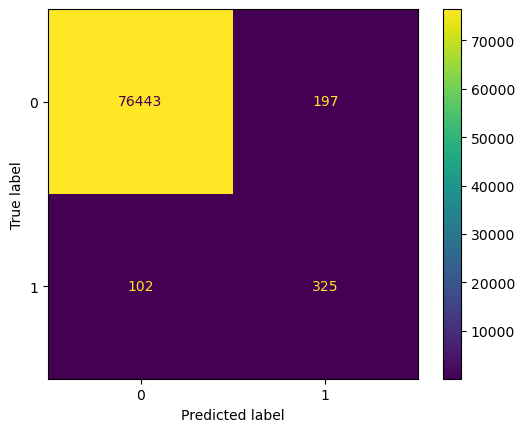

In [373]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, prediccion)

# plot the confusion matrix
disp = ConfusionMatrixDisplay(cm, display_labels=np.unique(y_test))
disp.plot()
plt.show()

## SVM

In [375]:
import matplotlib.pyplot as plt
from sklearn import svm
import numpy as np

In [ ]:
X_train_SVM = vector.transform(X_train)
clf = svm.SVC()
clf.fit(X_train_bow2, y_train2)

In [115]:
prediccionSVM = clf.predict(X_test_bow)
prediccionSVM

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [116]:
print(classification_report(y_test, prediccionSVM))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     76640
           1       0.85      0.27      0.41       427

    accuracy                           1.00     77067
   macro avg       0.92      0.64      0.71     77067
weighted avg       1.00      1.00      0.99     77067



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, prediccionSVM)

# plot the confusion matrix
disp = ConfusionMatrixDisplay(cm, display_labels=np.unique(y_test))
disp.plot()
plt.show()

## Regresión Logística

In [71]:
# Importar las bibliotecas necesarias
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Crear el modelo de regresión logística
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train_bow, y_train)

LogisticRegression(solver='liblinear')

In [73]:
prediccionRL = logreg.predict(X_test_bow)

In [75]:
print(classification_report(y_test, prediccionRL))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     76640
           1       0.81      0.17      0.28       427

    accuracy                           1.00     77067
   macro avg       0.90      0.58      0.64     77067
weighted avg       0.99      1.00      0.99     77067



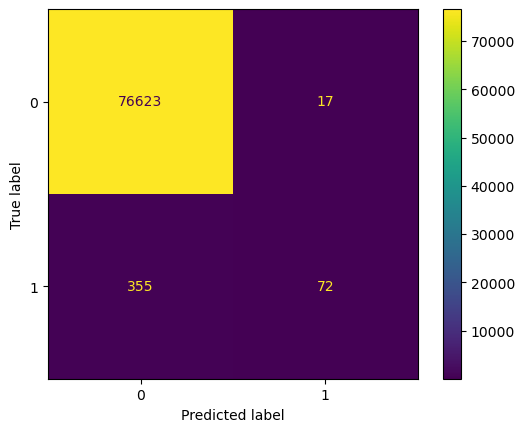

In [77]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, prediccionRL)

# plot the confusion matrix
disp = ConfusionMatrixDisplay(cm, display_labels=np.unique(y_test))
disp.plot()
plt.show()